In [12]:
import numpy as np
import pandas  as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
datas = pd.read_csv('../PRODIGY_ML_01/Dataset/train.csv')
datas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
datas['Features'] = datas['LotArea'] + datas['FullBath'] + datas['BedroomAbvGr'] + datas['HalfBath'] + datas['HalfBath'] + datas['BsmtHalfBath'] + datas['BsmtFullBath']
featuring = datas[['Features']]
targeting = datas['SalePrice']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(featuring, targeting, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

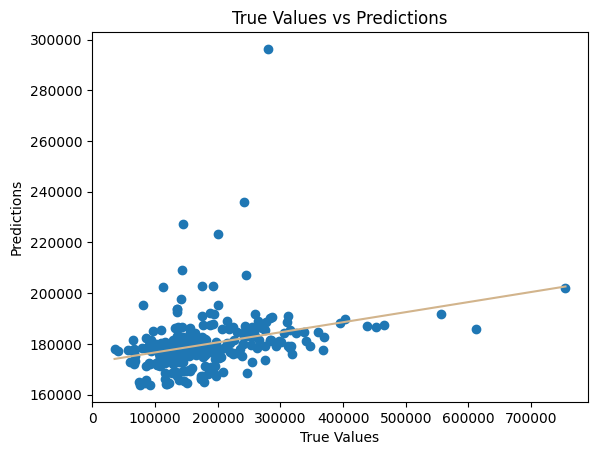

In [7]:
plt.scatter(y_test, predictions)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)), color='tan')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [13]:
tester = pd.read_csv('../PRODIGY_ML_01/Dataset/test.csv')
tester['Features'] = tester['LotArea'] + tester['FullBath'] + tester['BedroomAbvGr'] + tester['HalfBath'] + tester['BsmtHalfBath'] + tester['BsmtFullBath']
X_test_data = tester[['Features']]
imputer = SimpleImputer(strategy='mean')
X_test_data_imputed = pd.DataFrame(imputer.fit_transform(X_test_data), columns=X_test_data.columns)
predictions_test_data = model.predict(X_test_data_imputed)
tester['Predicted_SalePrice'] = predictions_test_data
tester


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Features,Predicted_SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,11625.0,183219.081693
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,14272.0,188280.318602
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,13836.0,187446.658121
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,9984.0,180081.382498
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,5009.0,170568.857517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,1941.0,164702.641107
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1899.0,164622.334364
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,20006.0,199244.101162
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,10446.0,180964.756677


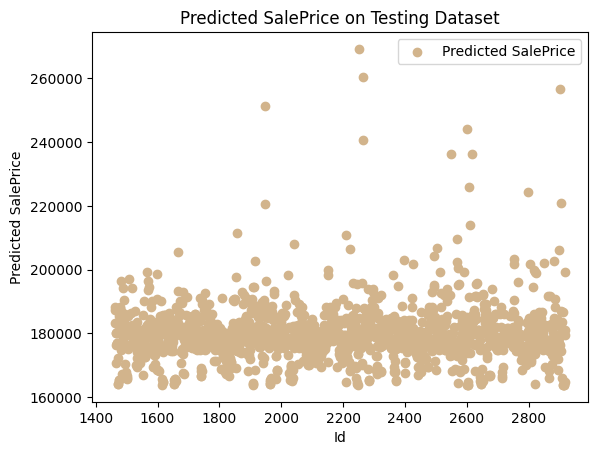

In [14]:
plt.scatter(tester['Id'], tester['Predicted_SalePrice'], label='Predicted SalePrice', color='tan')
plt.xlabel("Id")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted SalePrice on Testing Dataset")
plt.legend()
plt.show()
